# WINE GROUPING W/ K-MEANS CLUSTERING

## 1. Problem Definition

### Objective
The goal of this project is to apply k-means clustering to group wines based on their features (e.g., acidity, alcohol content, pH, etc.) and explore how the algorithm determines the natural groupings of the wines. The objective is to see if the algorithm decide the same number of clusters and evaluate how well these clusters correspond to the actual wine types (red and white).

### Key Steps:
- Preprocess the wine dataset, selecting relevant features for clustering (e.g., acidity, alcohol content, pH).
- Test to see if the optimal number of clusters corresponds to the original labels categories.
- Apply k-means clustering to the dataset.
- After clustering, analyze the resulting groups and compare them with the true wine labels (red vs. white).


### Success Criteria
The success of the clustering will be evaluated based on how well the groups formed by k-means align with the actual wine types (red and white). If the clustering aligns well with the true wine labels, it will suggest that the features used in the dataset are effective for distinguishing between red and white wines.

## 2. Data Collection & Preprocessing

All data is collected from a Wine Quality Dataset in Kaggle [here](https://www.kaggle.com/datasets/rajyellow46/wine-quality).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wine_data = pd.read_csv('winequalityN.csv')
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Data Quality

**Check To See How Many Missing Values**

In [5]:
print('Missing Value Count: ' + str(wine_data.isnull().sum().sum()))
wine_data.isnull().sum()[wine_data.isnull().sum() > 0]

Missing Value Count: 38


fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64

In [6]:
wine_data[wine_data.isnull().any(axis=1)].head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
33,white,6.2,0.12,0.34,NaN,0.045,43.0,117.0,0.9939,3.42,0.51,9.0,6
54,white,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.9930,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,6
98,white,9.8,0.36,0.46,10.5,NaN,4.0,83.0,0.9956,2.89,0.30,10.1,4


Given that we anticipate varying groupings of wine, imputing missing values using summary statistics could introduce bias into the dataset. Additionally, considering only 38 out of 6,497 or 0.6% of observations are affected, removing all rows with a missing value would be the best course of action to perserve the data's integrity. 

In [7]:
wine_data = wine_data.dropna()

**Check For Duplicate Values**

In [8]:
# grab all duplicated rows excluding the initial row
duplicates_rows = wine_data.duplicated(keep='first')
print(wine_data[duplicates_rows])
print("There are " + str(len(wine_data[duplicates_rows])) + " subsequent duplicate values.")

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4     white            7.2             0.230         0.32            8.50   
5     white            8.1             0.280         0.40            6.90   
7     white            7.0             0.270         0.36           20.70   
8     white            6.3             0.300         0.34            1.60   
39    white            7.3             0.240         0.39           17.95   
...     ...            ...               ...          ...             ...   
6461    red            7.2             0.695         0.13            2.00   
6462    red            7.2             0.695         0.13            2.00   
6465    red            7.2             0.695         0.13            2.00   
6479    red            6.2             0.560         0.09            1.70   
6494    red            6.3             0.510         0.13            2.30   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

Given the context of our project, it is reasonable to assume that all duplicated entries are seperate bottles of the same specific wine. That being addressed, since we are interested in the natural groupings of wine and K-Means Clustering can be skewed due to duplicated entries, it is beneficial to remove all duplicated rows.

In [9]:
wine_data = wine_data.drop_duplicates(keep='first')

**Check For Outliers**

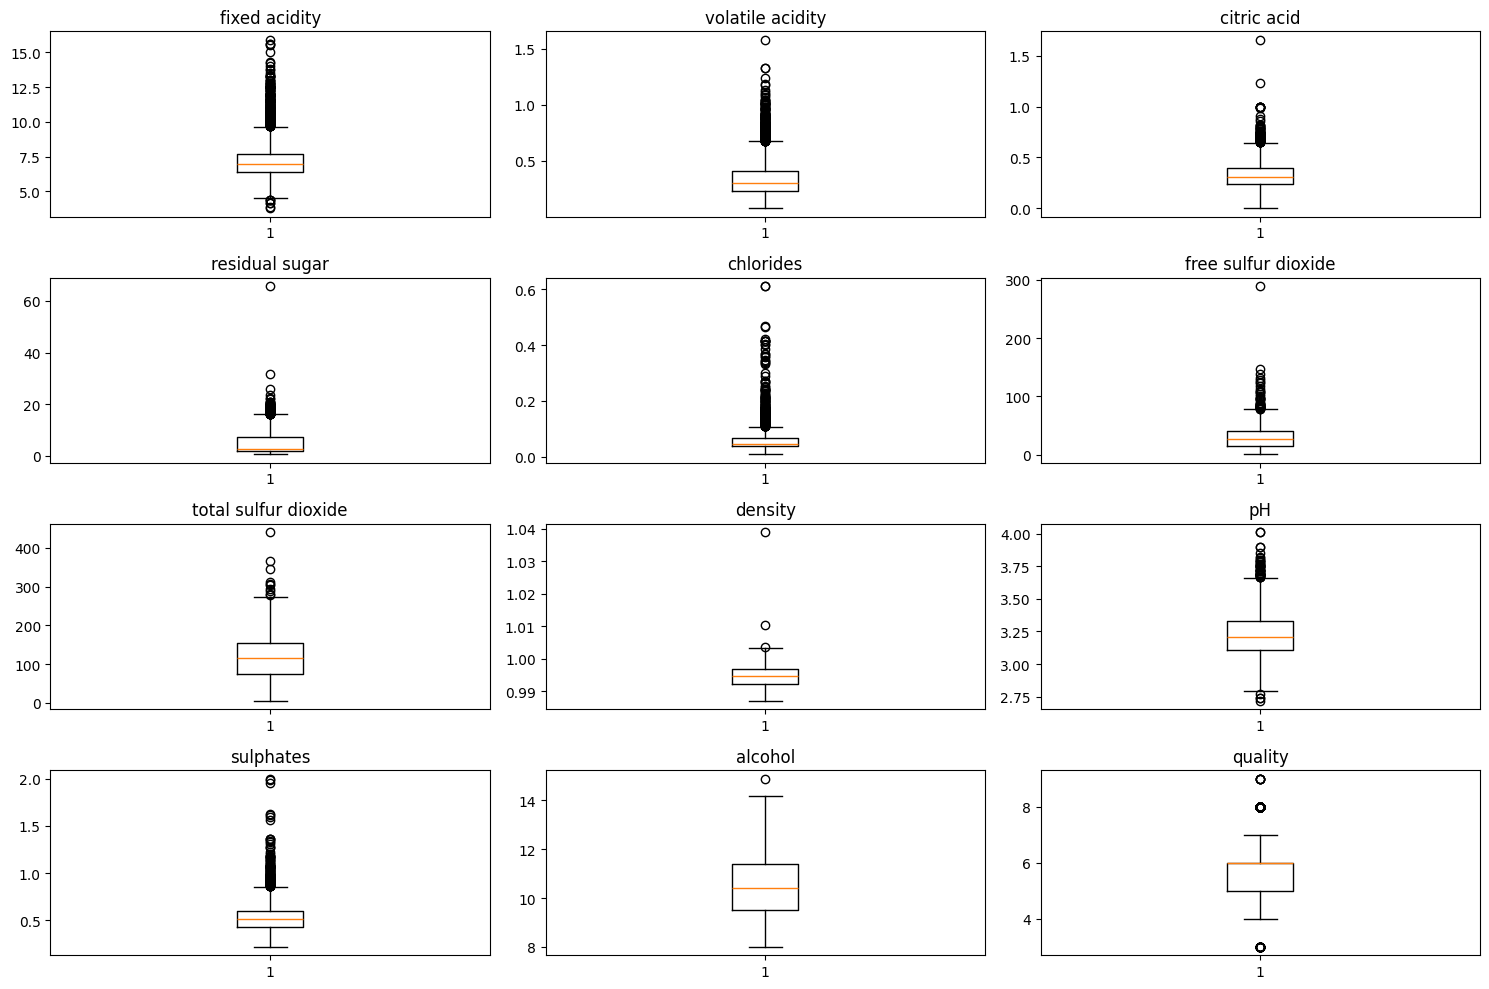

In [10]:
row = 0

columns = wine_data.columns[1:]
plt.figure(figsize=(15, 10))

for index, col in enumerate(columns):
    if col == 'type': continue    
    plt.subplot(4, 3, index + 1)
    plt.boxplot(wine_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Looking at this graph, we can see that 4 different features that have a maximum outlier: 
- Citric Acid
- Residual Sugar
- Free Sulfur Dioxide
- Density

In [11]:
# Checking to see outlier increase from next max value.
features = wine_data.columns[1:]

for feature in features:
    top_2  = wine_data[[feature]].sort_values(by=feature, ascending=False).head(2)
    print(feature.title() + " has a " + str(top_2.iloc[0][feature] / top_2.iloc[1][feature]) + " percent increase.")

Fixed Acidity has a 1.0192307692307694 percent increase.
Volatile Acidity has a 1.1879699248120301 percent increase.
Citric Acid has a 1.3495934959349594 percent increase.
Residual Sugar has a 2.0822784810126582 percent increase.
Chlorides has a 1.001639344262295 percent increase.
Free Sulfur Dioxide has a 1.9726962457337884 percent increase.
Total Sulfur Dioxide has a 1.2005457025920874 percent increase.
Density has a 1.0283876076412948 percent increase.
Ph has a 1.0 percent increase.
Sulphates has a 1.0101010101010102 percent increase.
Alcohol has a 1.0492957746478875 percent increase.
Quality has a 1.0 percent increase.


Given this information, we can remove the outlier for any feature with an increase of 1.2%. Additionally, we will remove the density outlier as it is an extreme value compared to its range.

In [12]:
remove_outliers = ['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density']

for feature in remove_outliers:
    wine_data = wine_data.drop(wine_data[feature].idxmax())
    
wine_data.reset_index(drop=True, inplace=True)

### Feature Selection

**Relevance of Features**

Considering we are attempting to make the algorithm group the wines using unsupervised learning, removing the labels and quality from the data is a necessary steps.<br>
Labels referring to the actual groupings of wine.<br>
Quality referring to the percieved quality of the wine.

In [13]:
labels = wine_data['type']
wine_data.drop(columns=['type', 'quality'], inplace=True)

**Correlated Features**

<Axes: >

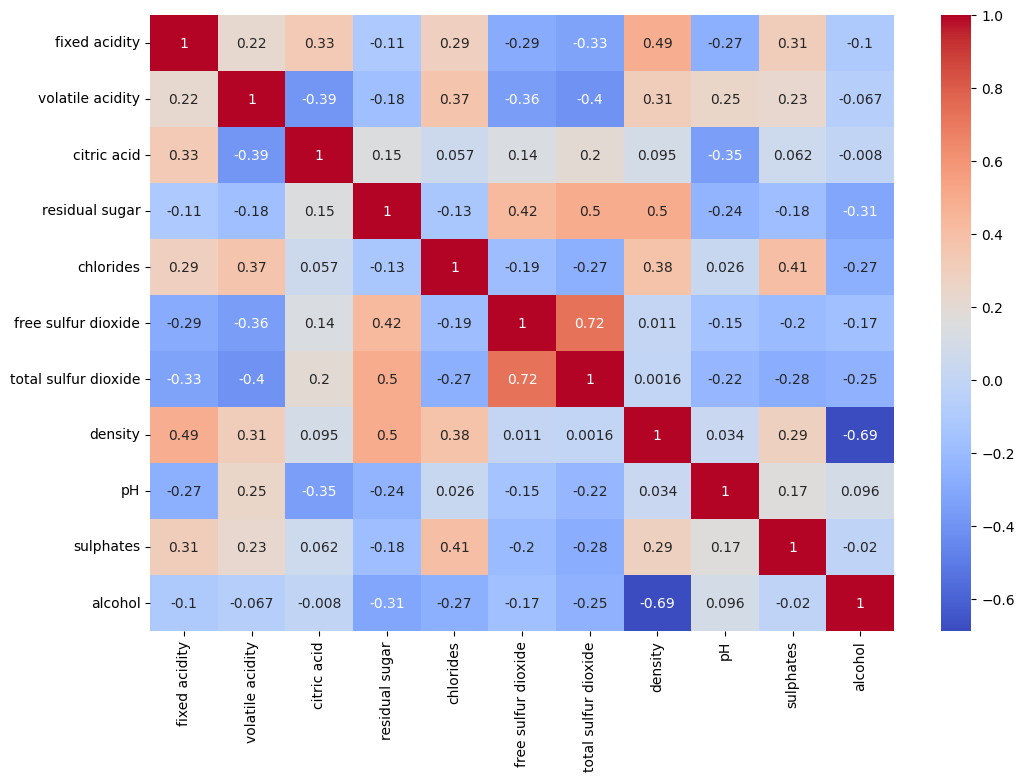

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')

Looking at the correlation matrix, we can see that the highest correlation value is 0.72 between free sulfur dioxite and total sulfur dioxide. Since this value exceeds the 0.7 threshold, indicating a moderate correlation, it may be beneficial to remove one of these variables.

In [15]:
wine_data.drop(columns='free sulfur dioxide', inplace=True)

### Data Normalization/Scaling

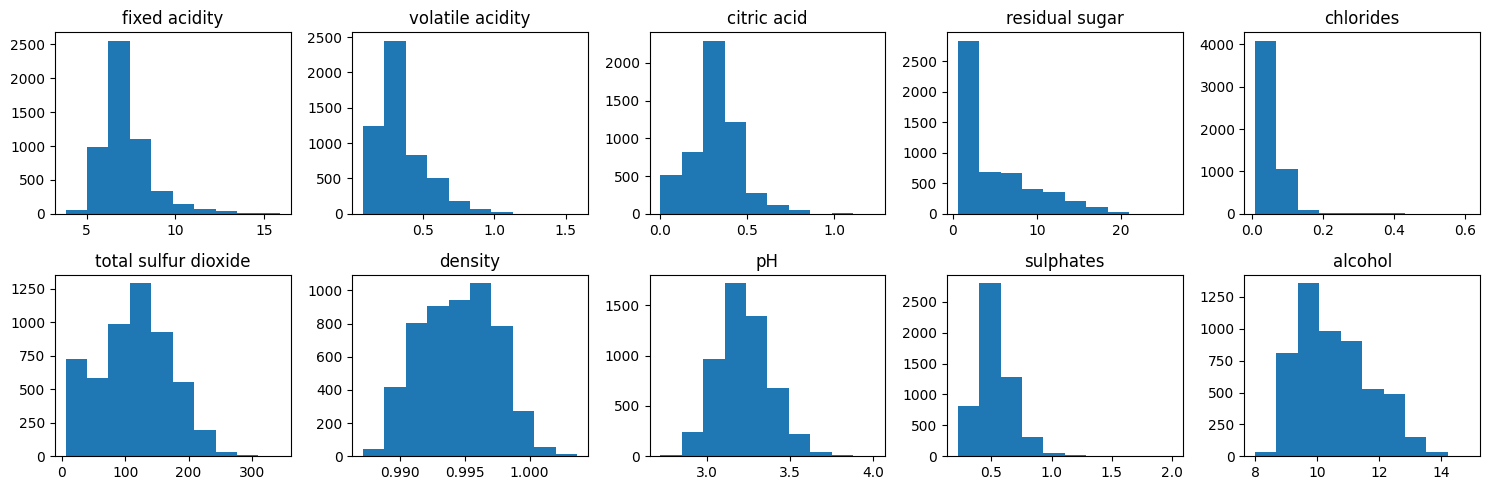

In [16]:
plt.figure(figsize=(15, 5))
for index, col in enumerate(wine_data.columns):
    plt.subplot(2, 5, index + 1)
    plt.hist(wine_data[col])
    plt.title(col)

plt.tight_layout()

Given the graphs, we can see there are certain features that are right-skewed and need to be scaled to help with the learning.
- Residual Sugar
- Chlorides
- Sulphates

In [17]:
from math import log
log_transformation_variables = ['residual sugar', 'chlorides', 'sulphates']

for feature in log_transformation_variables:
    wine_data[feature] = wine_data[feature].apply(lambda x: log(x))


**Z-Score Scaling**

Now that the features have been transformed, considering K-Means Clustering works by calculating eudlidean distances, it is imperative we scale the values so one feature does not outweight another in ways it shouldn't. Z-score normalization would work great as it allows feature to be on the same scale while still allowing discernible differences from one another in terms of standard deviation.

In [18]:
for col in wine_data.columns:
    wine_data[col] = (wine_data[col] - wine_data[col].mean()) / wine_data[col].std()

## 3. Choosing the Number of Clusters (k)

In [19]:
print(labels.unique())

['white' 'red']


Based on the data, we know that there are 2 groupings that the wine observations fall into, 'white' or 'red'. However, in many cases, the number of possible groupings may not be known; As such, it is essential that we are able to verify how many groupings exist with different methods. In this case, we will use the Elbow Method to help determine the optimal number of groups.

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

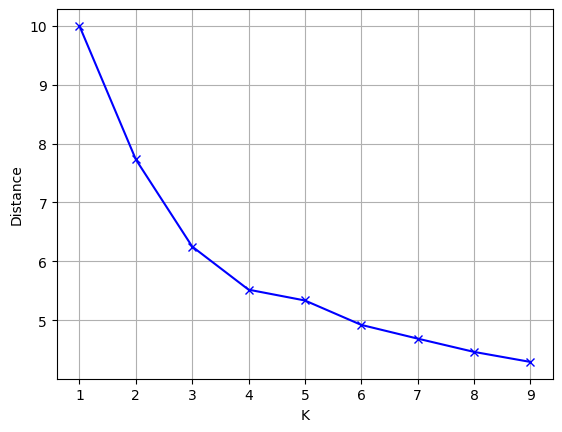

In [21]:
distances = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(wine_data)
    distances.append(sum(np.min(cdist(wine_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1) ** 2) / wine_data.shape[0])
    
plt.plot(K, distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Distance')
plt.grid()

Using the visual representation, we are able to see the distortion rate drops off at 4. This indicates that there may be a hidden grouping that was not apparent in the original data. For our case we will only be using one model with 2 clusters to see how well the it groups the wines compared to our original labels.

## 4. Applying K-Means Algorithm

Build the K-Means clustering model

In [22]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)

kmeans.fit(wine_data)
pred = kmeans.fit_predict(wine_data)

## 5. Evaluating the Results

**Cluster Size**

In [23]:
unique, counts = np.unique(pred, return_counts=True)

#cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:")
for i in range(len(unique)):
    print('cluster {}: {} points'.format(unique[i], counts[i]))

Cluster sizes:
cluster 0: 3904 points
cluster 1: 1386 points


In [24]:
# True Counts
labels.value_counts()

type
white    3937
red      1353
Name: count, dtype: int64

Upon comparing the distributions of the clustering predicted values and the initially provided values, we observe that both groupings contain the same proportion of data points.

**Silhouette Score**

In [25]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(wine_data, pred)
print("Silhouette Score: {}".format(sil_score))

Silhouette Score: 0.2735134231955943


With a Silhouette score of 0.27, we can see that there is not much seperation between the clusters themselves indicating they share a similar range between many features.

**Comparing Labels and Completeness**

In [26]:
from sklearn.metrics import adjusted_rand_score

# encode actual labels
actual_labels = labels.map({'white': 0, 'red': 1})

ari_score = adjusted_rand_score(actual_labels, pred)
print("Adjusted Rand Index: " + str(ari_score))


Adjusted Rand Index: 0.9362360186879866


Based on these values, it's clear that the clustering model performed well. The ARI showing the clusters match the actual wine types. This suggests our model is able to grouping the wines accurately.

## 6. Interpretation and Analysis

Considering we assigned white wine with a value of 0 and red wine with a value of 1 and they match the predicted clusterings with a high accuracy, we can assume the clusterings given by the model match the actual values.

In [27]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=wine_data.columns)
print(centroid_df)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.293873         -0.399372     0.110532        0.169954  -0.399584   
1       0.827764          1.124926    -0.311340       -0.478716   1.125523   

   total sulfur dioxide   density        pH  sulphates   alcohol  
0              0.404534 -0.268957 -0.179159  -0.296048  0.050099  
1             -1.139466  0.757581  0.504643   0.833889 -0.141116  


The analysis of centroids shows that most features are less than one standard deviation apart, suggesting a high level of similarity. However, three features, Fixed Acidity (1.12), Volatil Acidity (1.52), and Chlorides (1.54), have a larger distance between the centroids. These features most likely play a significant role in determining which cluster an observation is grouped into.

Text(0.5, 1.0, 't-SME Clustering Mapping')

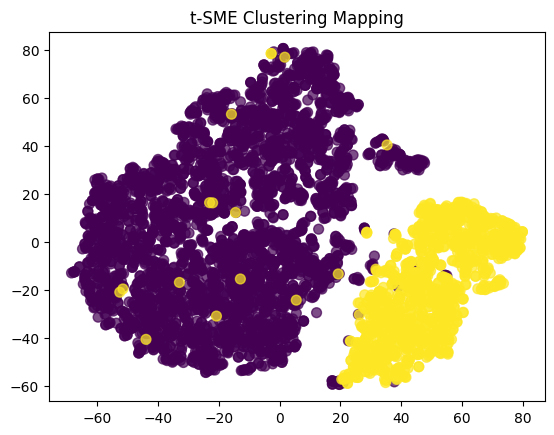

In [28]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=12).fit_transform(wine_data)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=actual_labels, s=50, alpha=0.7)
plt.title('t-SME Clustering Mapping')